# **Predict Password Strength using Natural Language Processing**

* Password - 1000k unique values for password collected from online
* Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong.
* Strength of the password based on rules(such as containing digits, special symbols , etc.)
* The passwords used in our analysis are from 000webhost leak that is available online


# Read data from SQL Database

In [1]:
# importing all necessary libraries ..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# Create a SQL connection to our SQLite database
sql_con = sqlite3.connect('password_data.sqlite')

In [3]:
# check online its table name on https://sqliteonline.com/
df = pd.read_sql_query("SELECT * FROM Users", sql_con)

In [4]:
df.head(3)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


In [5]:
df.shape

(100000, 3)

# Data Preprocessing

In [6]:
df.columns

Index(['index', 'password', 'strength'], dtype='object')

In [7]:
# Removing ir-relevant feature
df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head(3)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1


In [9]:
# Check duplicate rows
df.duplicated().sum()

0

In [10]:
# Check missing values in columns
df.isnull().sum()

password    0
strength    0
dtype: int64

In [11]:
# Check data-types
df.dtypes

password    object
strength     int64
dtype: object

In [12]:
# Check "strength" feature
df['strength'].unique()

array([1, 2, 0])

# Performing Semantic Analysis

* How many password textual actually holds only numeric characters ?
* How many password textual actually holds only Upper-case character ?
* How many password textual actually holds only alphabet ?
* How many password textual actually holds alpha-numeric character ?
* How many password textual actually holds title-case character ?
* How many password textual actually holds some special special character ?

In [13]:
df.columns

Index(['password', 'strength'], dtype='object')

In [14]:
df['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [15]:
df['password'][0]

'zxe870819'

In [16]:
type(df['password'][0])

str

In [17]:
# No of password textual actually holds only numeric characters
df[df['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [18]:
# No of password textual actually holds only Upper-case character
df[df['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [19]:
# No of password textual actually holds only alphabet
df[df['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [20]:
# No of password textual actually holds alpha-numeric character
df[df['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [21]:
# No of password textual actually holds title-case character
df[df['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [22]:
# No of password textual actually holds special character
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def find_semantics(row):
  for char in row:
      if char in string.punctuation:
        return 1
      else:
        pass

In [24]:
df[df['password'].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


# Applying Feature Engineering

Password strength depends on 5 factors :
* Length of password
* Frequency of Lowercase Characters
* Frequency of Uppercase Characters
* Frequency of Numeric Characters
* Frequency of Special Characters

In [25]:
# length of every Password
df['lenght'] = df['password'].str.len()
df['lenght']

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: lenght, Length: 100000, dtype: int64

In [26]:
password = "Shan99"
len([char for char in password if char.islower()])/len(password)

0.5

In [27]:
# Frequency of Lowercase Characters
def freq_lowercase(row):
  return len([char for char in row if char.islower()])/len(row)

In [28]:
# Frequency of Uppercase Characters
def freq_uppercase(row):
  return len([char for char in row if char.isupper()])/len(row)

In [29]:
# Frequency of Numeric Characters
def freq_numerical_case(row):
  return len([char for char in row if char.isdigit()])/len(row)

In [30]:
# applying user-defined functions

df["lowercase_freq"] = np.round(df["password"].apply(freq_lowercase) , 3)
df["uppercase_freq"] = np.round(df["password"].apply(freq_uppercase) , 3)
df["digit_freq"] = np.round(df["password"].apply(freq_numerical_case) , 3)

In [31]:
df.head(3)

,password,strength,lenght,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


In [32]:
# Frequency of Special-case Characters

def freq_special_case(row):
  special_chars = []
  for char in row:
    if not char.isalpha() and not char.isdigit():
      special_chars.append(char)
  return len(special_chars)

In [33]:
# applying "freq_special_case" function

df["special_char_freq"] = np.round(df["password"].apply(freq_special_case) , 3)
df.head(3)

,password,strength,lenght,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0


In [34]:
df.head(2)

,password,strength,lenght,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0


In [35]:
# Noromalising "special_char_freq" feature
df["special_char_freq"] = df["special_char_freq"]/df["lenght"]
df.head(3)

,password,strength,lenght,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.0
2,soporte13,1,9,0.778,0.0,0.222,0.0


# Performing Descriptive Statistics

In [36]:
df.columns

Index(['password', 'strength', 'lenght', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [37]:
df[['lenght', 'strength']].groupby(['strength']).agg(['min','max','mean','median'])

lenght                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [38]:
cols=['lenght', 'lowercase_freq', 'uppercase_freq', 'digit_freq', 'special_char_freq']
for col in cols:
  print(col)
  print(df[[col, 'strength']].groupby(['strength']).agg(['min', 'max', 'mean', 'median']))
  print('\n')


lenght
         lenght                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

- Higher the length, Higher the strength
- In case on alphabet frequency higher is not better.Probably because it'll not be a strong password if max portion is occupied by just alphabets..
Password has more strength if the char types are spread in decent proportions.

In [39]:
df.columns

Index(['password', 'strength', 'lenght', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

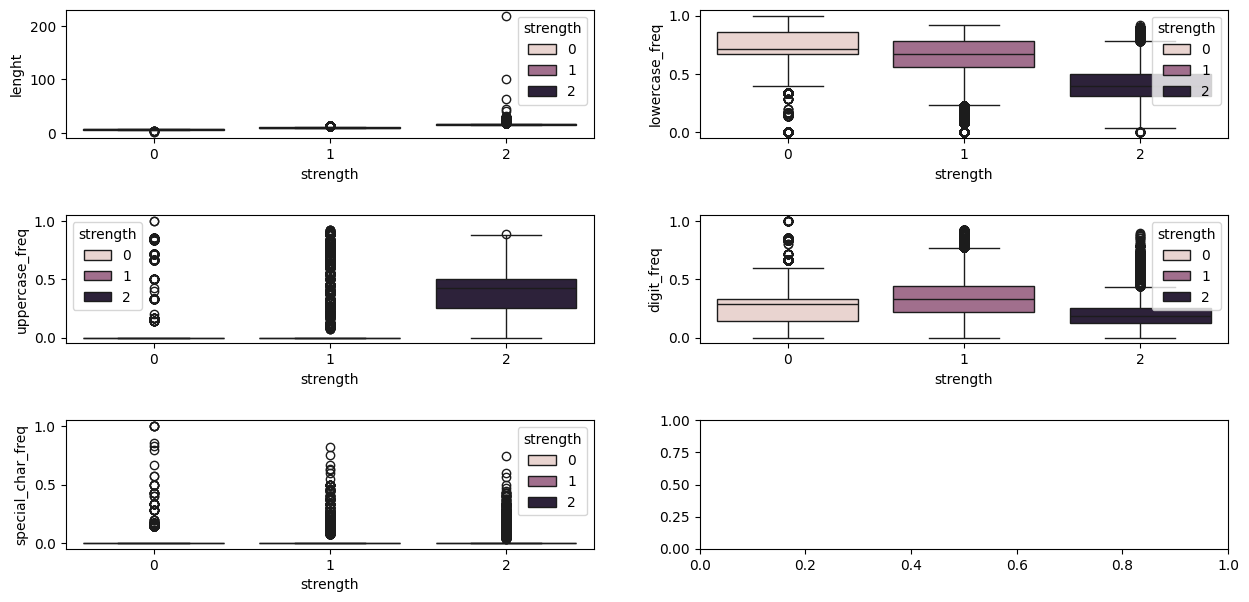

In [40]:
# Visualize boxplot for 5-point summary of data

fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='lenght' , hue="strength" , ax=ax1 , data=df)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=df)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=df)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=df)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=df)

plt.subplots_adjust(hspace=0.6)
plt.show()

- Higher Lowercase frequency is seen in low strength passwords.For higher strength passwords , Lowercase frequency can be high too but that is prob
ably effect of length.
- In digit_freq there is a split of majority poplutation of strength 1 and 2 but for 0 and 1 strength , there is overlap so no too much to say there. But we can say a nicely propotioned password is good.
- In upper_freq , there is a trend but not as strong as length or lower_freq.
- Similar but stronger same trend as above in special_freq.
- Higher strength passwords have more type breaks.

# Feature Importance

In [41]:
df.columns

Index(['password', 'strength', 'lenght', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

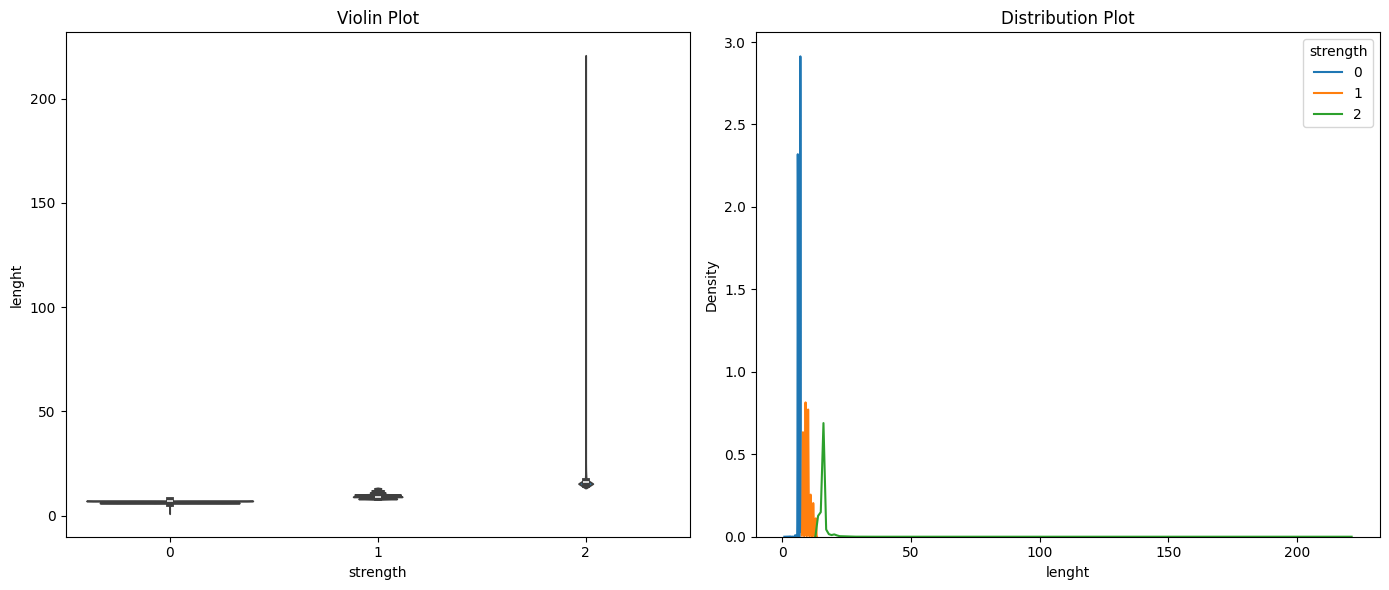

In [42]:
def get_dist(data, feature):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Violin plot
    sns.violinplot(x='strength', y=feature, data=data, ax=axes[0])
    axes[0].set_title('Violin Plot')

    # Distribution plot
    for i in range(3):
        sns.kdeplot(data=data[data['strength']==i][feature], label=str(i), ax=axes[1])
    axes[1].set_title('Distribution Plot')

    plt.legend(title='strength')
    plt.tight_layout()
    plt.show()

# Example usage:
get_dist(df, 'lenght')


- We have few overlappping region in distribution plot
- When class is 2 , we have higher value of 'length' than class 1 & class 0
- It means 'length' is a interesting feature as we have very less overlapping region
- Similarly from violinplot ,we will say on account of less overlappping
- This feature 'length' is amazing & useful in determining the strength


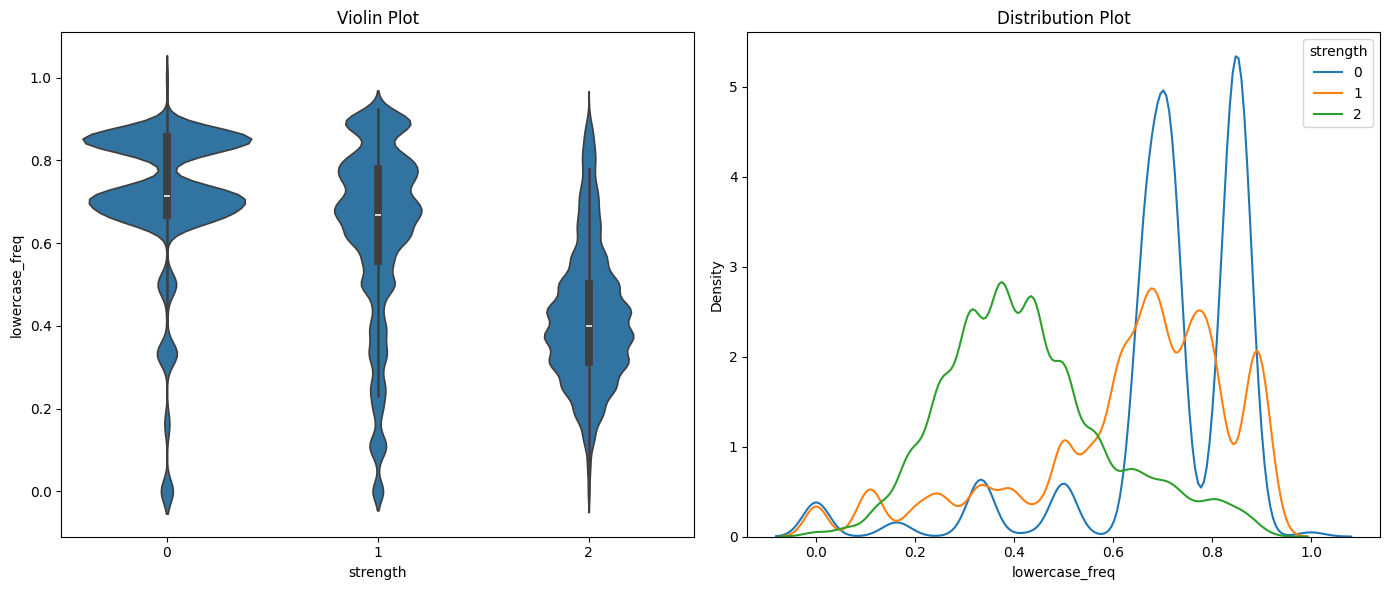

In [43]:
get_dist(df , 'lowercase_freq')

- we have some kind of overlappping region in distribution plot
- when class is 2 , we have less value of 'lower_freq' than class 1 & class 0
- it means 'lower_freq' is a interesting feature upto some extent as have some overlapping region
- similarly from violinplot ,we will say on account of such overlappping ,
- when class is 2 we have less value of 'lower_freq' than class 1 & class 0
- this feature 'lower_freq' is a interesting feature upto some extent in determining the strength

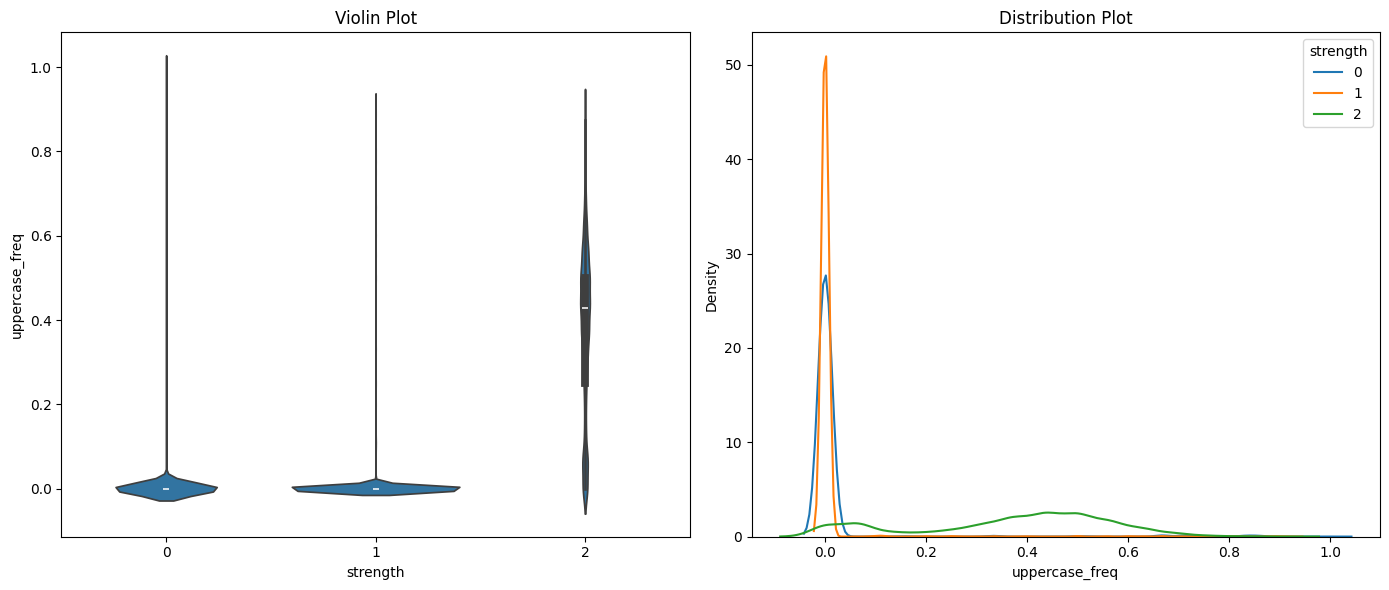

In [44]:
get_dist(df , 'uppercase_freq')

- we have quite high overlappping region in distribution plot
- it means 'upper_freq' is not that much interesting feature as have some overlapping region
- similarly from violinplot ,we will say on account of such huge overlappping ,
- this feature 'lower_freq' is not a interesting feature in determining the strength

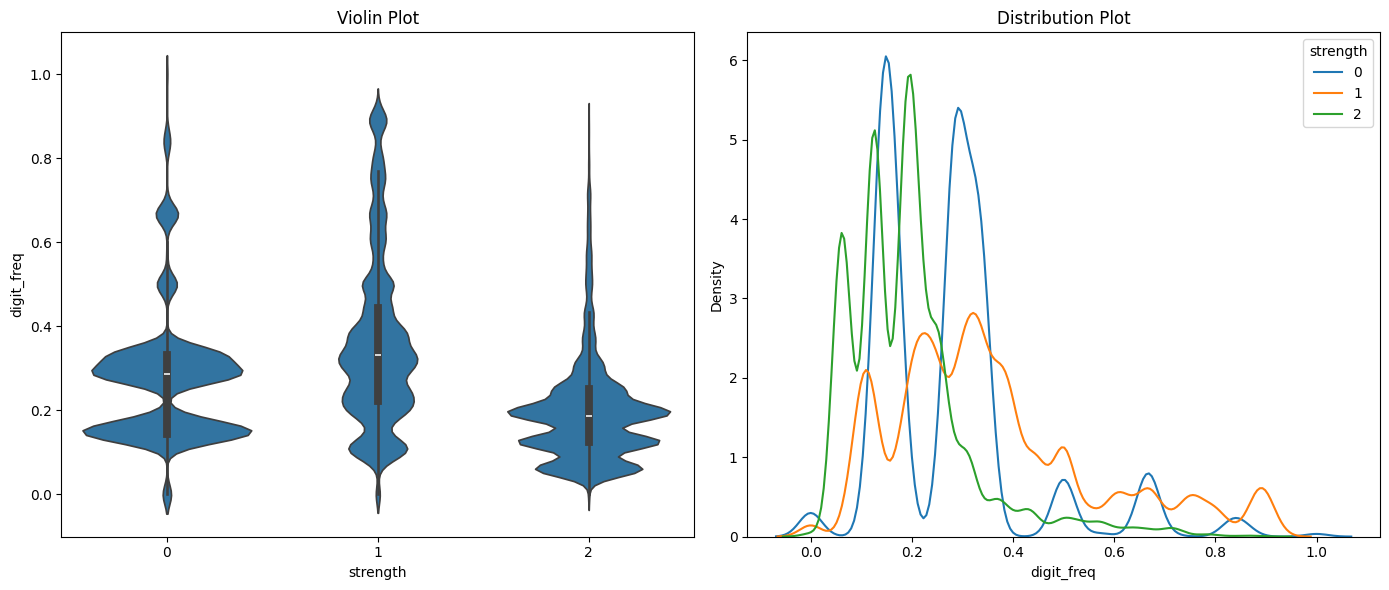

In [45]:
get_dist(df , 'digit_freq')

- we have quite high overlappping region in distribution plot
- it means 'upper_freq' is not that much interesting feature as have some overlapping region
- similarly from violinplot ,we will say on account of such huge overlappping ,
- this feature 'lower_freq' is not a interesting feature in determining the strength

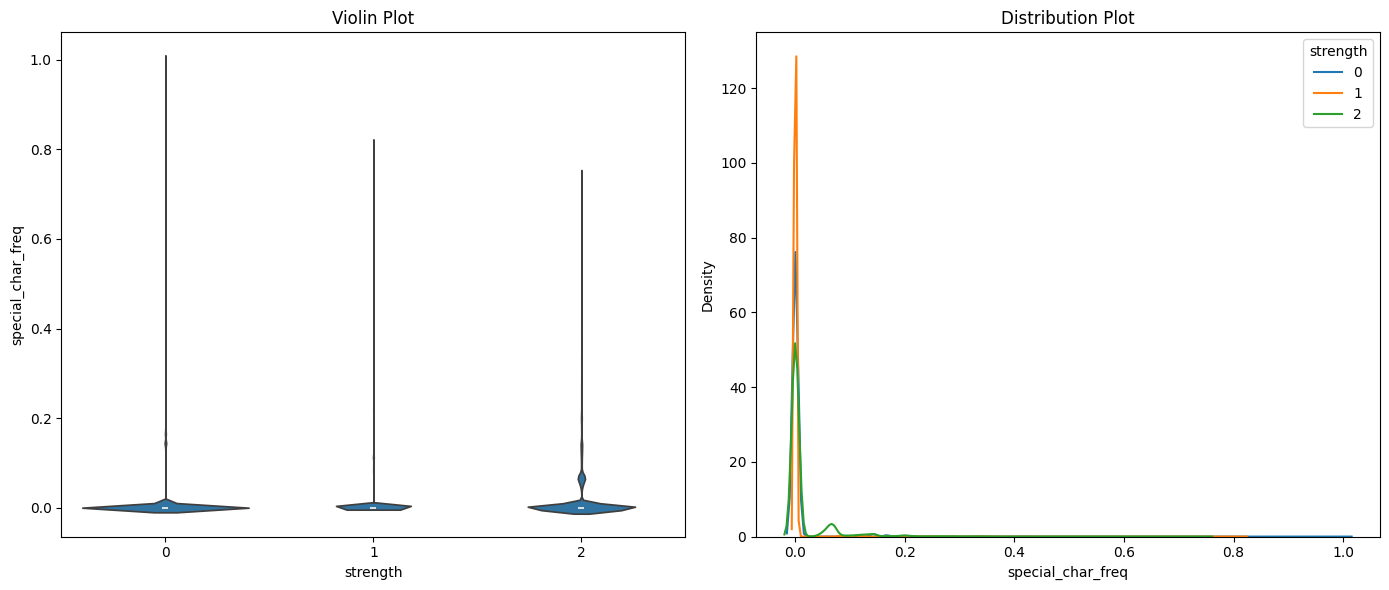

In [46]:
get_dist(df , 'special_char_freq')

- It ives us idea that length & lowercase freq are important features.

# Applying TF_IDF on data

In [47]:
df

,password,strength,lenght,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [48]:
# Shuffle the data randomly
df2 = df.sample(frac=1)
df2

,password,strength,lenght,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
75730,cenoura123,1,10,0.700,0.000,0.300,0.0
10770,jrvypkufm846,1,12,0.750,0.000,0.250,0.0
33679,parkur123,1,9,0.667,0.000,0.333,0.0
40460,AAvVkHTg5NALPI9Z,2,16,0.188,0.688,0.125,0.0
56354,pr4muri4mud4,1,12,0.750,0.000,0.250,0.0
...,...,...,...,...,...,...,...
24441,03248578a,1,9,0.111,0.000,0.889,0.0
64135,joshjo8br8,1,10,0.800,0.000,0.200,0.0
82219,jotowaya1,1,9,0.889,0.000,0.111,0.0
26312,77567744c,1,9,0.111,0.000,0.889,0.0


In [49]:
x = list(df['password'])
# x

In [50]:
# Import TF-IDF vectorizer to convert text data into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
vectorizer = TfidfVectorizer(analyzer='char')

In [52]:
X = vectorizer.fit_transform(x)

In [53]:
X.shape

(100000, 99)

In [54]:
df2['password'].shape

(100000,)

In [55]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [56]:
# Get entire matrix of TF-IDF for 100000 passwords
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
# TF-IDF scores of 1st row
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.27146449, 0.20826259, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.31465019, 0.60976358, 0.29118163,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23495232, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.38041451, 0.        , 0.35694933, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [58]:
df2['password']

75730          cenoura123
10770        jrvypkufm846
33679           parkur123
40460    AAvVkHTg5NALPI9Z
56354        pr4muri4mud4
               ...       
24441           03248578a
64135          joshjo8br8
82219           jotowaya1
26312           77567744c
508              0o9i8u7y
Name: password, Length: 100000, dtype: object

In [59]:
len(vectorizer.get_feature_names_out())

99

In [60]:
# Returns feature/char_of_passwords/columns names
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [61]:
df3 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df3

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying Machine Learning algorithm

In [62]:
df2.columns

Index(['password', 'strength', 'lenght', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [63]:
df3['lenght'] = df2['lenght']
df3['lowercase_freq'] = df2['lowercase_freq']
df3

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,lenght,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [64]:
y = df['strength']

In [65]:
# Split data into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.20, random_state=42)

In [66]:
X_train.shape

(80000, 101)

In [67]:
y_train.shape

(80000,)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
# Apply Multinomial logistic Regression as have data have 3 categories in outcomes
model = LogisticRegression(multi_class='multinomial')

In [70]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [71]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 2, 1])

In [72]:
from collections import Counter
Counter(y_pred)

Counter({0: 2700, 1: 14852, 2: 2448})

**Doing prediction on sample data (user-entered input)**

As Logistic reg. model was trained on 101 features `99 from TF-IDF + 2 features from (total_length+lower_case_freq)`,
Hence we need to convert any input(password) into `shape (1,101)` so that my model will accept this as Input

In [73]:
password = 'Ymkpxj3907'

In [74]:
sample_array = np.array([password])

In [75]:
sample_matrix = vectorizer.transform(sample_array)

In [76]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.27490617, 0.        , 0.        , 0.27328613, 0.        ,
        0.        , 0.        , 0.31863939, 0.        , 0.29487329,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.35242209, 0.31450968, 0.        , 0.28069333,
        0.        , 0.        , 0.33532817, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.38523748, 0.31384814, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [78]:
sample_matrix.toarray().shape

(1, 99)

Right now, array dimension is (1, 99), so we need to make it as (1, 101), so that our model will accept it as input.

We need to add (length_of_password) & (total_lowercase_chars) in passsword

In [82]:
password

'Ymkpxj3907'

In [83]:
len(password)

10

In [84]:
[char for char in password if char.islower()]

['m', 'k', 'p', 'x', 'j']

In [91]:
# Frequency of lowercase characters in the password as a ratio
freq_lower = len([char for char in password if char.islower()])/len([password])
freq_lower

5.0

In [95]:
np.append(sample_matrix.toarray(), (10, freq_lower))

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.27490617,  0.        ,  0.        ,  0.27328613,  0.        ,
        0.        ,  0.        ,  0.31863939,  0.        ,  0.29487329,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.35242209,  0.31450968,  0.        ,  0.28069333,
        0.        ,  0.        ,  0.33532817,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.38523748,  0.31384814,  0.        ,  0.        ,  0.  

In [94]:
np.append(sample_matrix.toarray(), (10, freq_lower)).shape

(101,)

In [96]:
np.append(sample_matrix.toarray(), (10, freq_lower)).reshape(1,101)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.27490617,  0.        ,  0.        ,  0.27328613,  0.        ,
         0.        ,  0.        ,  0.31863939,  0.        ,  0.29487329,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.35242209,  0.31450968,  0.        ,  0.28069333,
         0.        ,  0.        ,  0.33532817,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.38523748,  0.31384814,  0.        ,  0. 

In [97]:
np.append(sample_matrix.toarray(), (10, freq_lower)).reshape(1,101).shape

(1, 101)

In [99]:
new_matrix = np.append(sample_matrix.toarray(), (10, freq_lower)).reshape(1,101)

In [100]:
model.predict(new_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [101]:
# lets Automate it (Design a function)
def predict(password):
  # Vectorize the password using the pre-trained vectorizer
  sample_array = np.array([password])
  sample_matrix = vectorizer.transform(sample_array)

  # Calculate password length and normalized lowercase frequency
  length_pass = len(password)
  length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)

  # Append password features to the sample matrix
  new_matrix2 = np.append(sample_matrix.toarray(), (length_pass, length_normalised_lowercase)).reshape(1, -1)

  # Predict the strength of the password using the pre-trained classifier
  result = model.predict(new_matrix2)

  # Map the predicted result to corresponding strength label
  strength_labels = {0: 'Weak', 1:'Normal', 2: 'Strong'}
  predicted_strength = strength_labels[result[0]]

  return f'The password is {predicted_strength}'


In [103]:
# Test the function
password = input("Enter a password: ")
prediction = predict(password)
print(prediction)

Enter a password: Odrer@sffrgrezsEE2057
The password is Strong


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Model evaluation

In [104]:
# Check Accuracy of your model using confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [105]:
accuracy_score(y_test, y_pred)

1.0

In [106]:
confusion_matrix(y_test, y_pred)

array([[ 2700,     0,     0],
       [    0, 14852,     0],
       [    0,     0,  2448]])

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2700
           1       1.00      1.00      1.00     14852
           2       1.00      1.00      1.00      2448

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

